# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [1]:
import numpy as np 
import pandas as pd


# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn
from sklearn import metrics

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data 

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

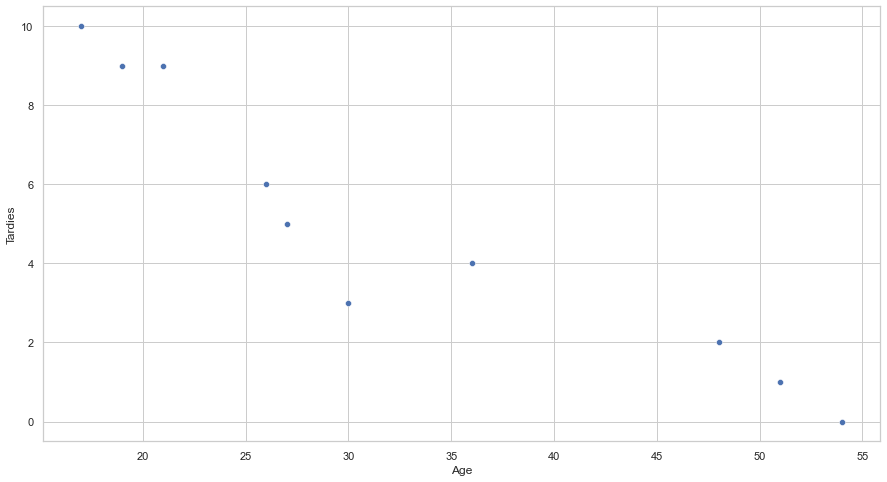

In [3]:
# Your code here.
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# Ho: There is no relation 

# H1 :Hypotheses the younger the students are, the more likely they are going to be
# late in class (Cason)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
student_data.cov() # covariance 

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [6]:
student_data.corr() # correlation

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

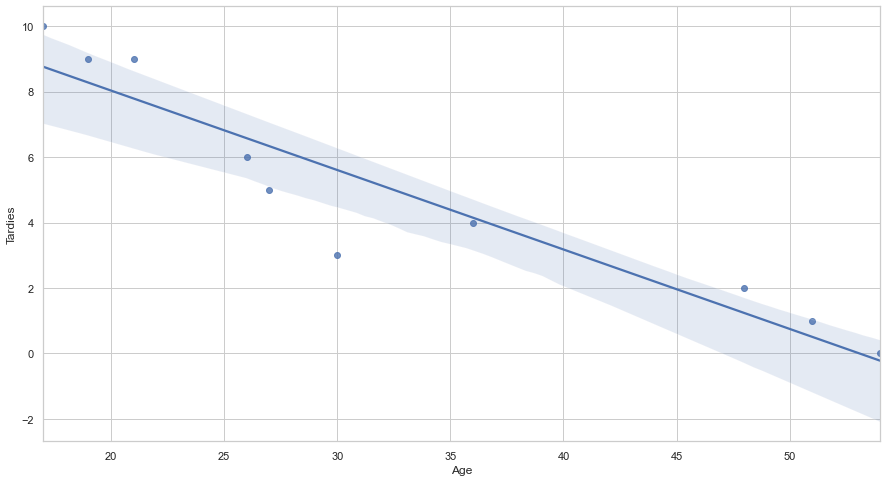

In [7]:
sns.regplot(x="Age", y="Tardies", data=student_data);

## Linear regression by hand

In [8]:
# Your response here.
lr = LinearRegression()

In [9]:
lr.fit(
    X = student_data[["Age"]], 
    y = student_data["Tardies"]
)

LinearRegression()

In [10]:
[element for element in dir(lr)][:2]


['__abstractmethods__', '__class__']

In [11]:
beta_0 = lr.intercept_ # where it crosses the Y axis: N
beta_0

12.888803363135768

In [12]:
beta_1 = lr.coef_[0] # slope, what multiplies the X: M
beta_1

-0.2428207709159808

In [13]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(f"beta_0: {beta_0}, which is the intercept\nbeta_1: {beta_1}, which is the slope or coef_[0]")

beta_0: 12.888803363135768, which is the intercept
beta_1: -0.2428207709159808, which is the slope or coef_[0]


In [14]:
student_data.sample()

,Age,Tardies
7,26,6


In [15]:
student_data["prediction_through_lr_scikitlearn"] = (student_data.Age * beta_1) + beta_0
student_data

,Age,Tardies,prediction_through_lr_scikitlearn
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


## Linear Regression with skelearn 

In [16]:
student_data

,Age,Tardies,prediction_through_lr_scikitlearn
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


In [17]:
X = student_data[["Age"]] #Double brackets for scikit-learn
y = student_data["Tardies"]

In [18]:
lr_2 = LinearRegression()

In [19]:
lr_2.fit(X, y)

LinearRegression()

In [20]:
student_data["prediction_2"] = lr_2.predict(X)
student_data.drop(["prediction_through_lr_scikitlearn"], axis=1, inplace=True)
student_data

,Age,Tardies,prediction_2
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


## Linear regression with statsmodels

In [21]:
results = smf.ols("Age ~ Tardies", data=student_data).fit()

In [22]:
results.summary()

C:\Users\rapha\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           5.57e-05
Time:                        16:27:29   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Tardies       -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

In [23]:
student_data

,Age,Tardies,prediction_2
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


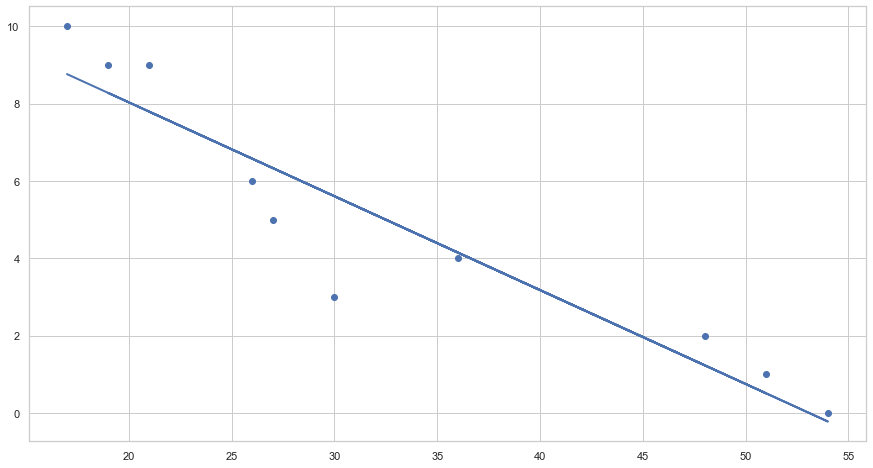

In [24]:
x = student_data.Age
y = student_data.Tardies 
line = beta_0 + beta_1 * x
plt.scatter(x,y)
plt.plot(x,line, lw=2)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [25]:
# Your response here. 
# There is a clear negative correlation between age and tardiness. 
# R-squared of the model is pretty high 0.882 - leaving less than 12% 
# that the model doesn't explain 
# P>|t| is 0 showing again that  you can reject the null hypothesis as it is 
# close to 0  

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [26]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [27]:
vehicles.drop(['Transmission', 'Engine Displacement', 'Drivetrain', 'Vehicle Class', 'Fuel Type',  'City MPG', 'Highway MPG'], axis = 1, inplace = True) 
vehicles

,Make,Model,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,4.0,19.388824,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,6.0,25.354615,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,4.0,20.600625,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,6.0,25.354615,13,683.615385,2550
4,ASC Incorporated,GNX,1987,6.0,20.600625,16,555.437500,2550
...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,3.0,9.155833,36,244.000000,1100
35948,smart,fortwo coupe,2014,3.0,9.155833,36,243.000000,1100
35949,smart,fortwo coupe,2015,3.0,9.155833,36,244.000000,1100
35950,smart,fortwo coupe,2016,3.0,9.155833,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [28]:
# Your response here. 
vehicles.corr() # correlation

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


In [29]:
# Year is negatively correlated with CO2 Emission Grams/Mile but it is only -0.22
# Among the positive correlatin the smallest one is the cylynders, whereas Fuel Barrels/ Year are at the highest level
# Combined MPG is strongly negatively correlated with CO2 Emission Grams/Mile. It makes sense

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [30]:
vehicles.rename(columns={'CO2 Emission Grams/Mile': 'CO2EmissionGramsMile',
                   'Fuel Barrels/Year': 'FuelBarrelsYear',
                    'Combined MPG': 'CombinedMPG',
                     'Fuel Cost/Year': 'FuelCostYear'},
          inplace=True)

In [37]:
results = smf.ols("CO2EmissionGramsMile ~  Year + Cylinders + FuelBarrelsYear + CombinedMPG + FuelCostYear ", data=vehicles).fit()

# Multiple linear regression model using statsmodels

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [35]:
# Your response here. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.981
Model:                              OLS   Adj. R-squared:                  0.981
Method:                   Least Squares   F-statistic:                 3.687e+05
Date:                  Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                          16:31:10   Log-Likelihood:            -1.5173e+05
No. Observations:                 35952   AIC:                         3.035e+05
Df Residuals:                     35946   BIC:                         3.035e+05
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         769.8883     19.392     39.702      0.000     731.880     807.897
Year               -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders           1.8788      0.083     22.598      0.000       1.716       2.042
FuelBarrelsYear    19.0529      0.061    311.600      0.000      18.933      19.173
CombinedMPG        -3.0404      0.042    -71.645      0.000      -3.124      -2.957
FuelCostYear        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# R-squared is very high - close to 1 
# P>|t| - 0.000  for all the value are P>|t|

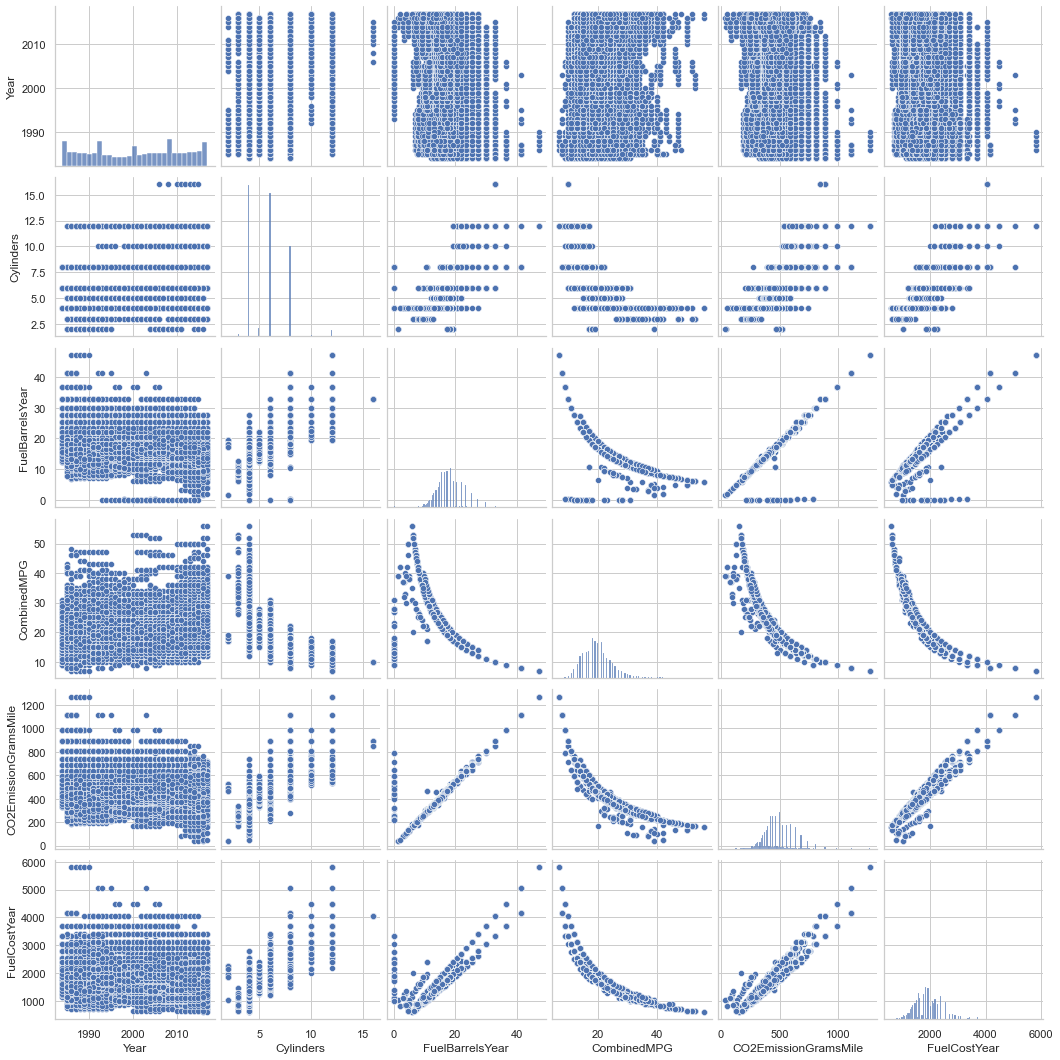

In [36]:
sns.pairplot(vehicles);

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [41]:
# Your code here. 

Error_analysis = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
Error_analysis

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

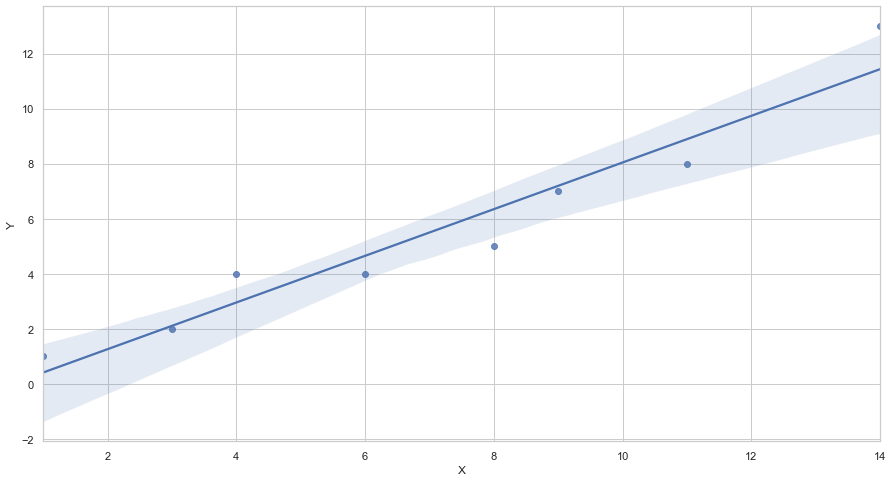

In [43]:
# Your code here.
sns.regplot(x="X", y="Y", data=Error_analysis);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
# Strong correlation between the variables, three outliers, 
# positive linear relationship 


In [51]:
results3 = smf.ols("Y ~ X", data = Error_analysis).fit().summary()
results3

C:\Users\rapha\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           0.000102
Time:                        17:13:25   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [44]:
# Your response here. 
# Outliers x,y (4,4), (8,5), (14,12) - 
Error_analysis_2 = pd.DataFrame({'X': [1,3,6,9,11], 'Y': [1,2,4,7,8]})
Error_analysis_2

,X,Y
0,1,1
1,3,2
2,6,4
3,9,7
4,11,8


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

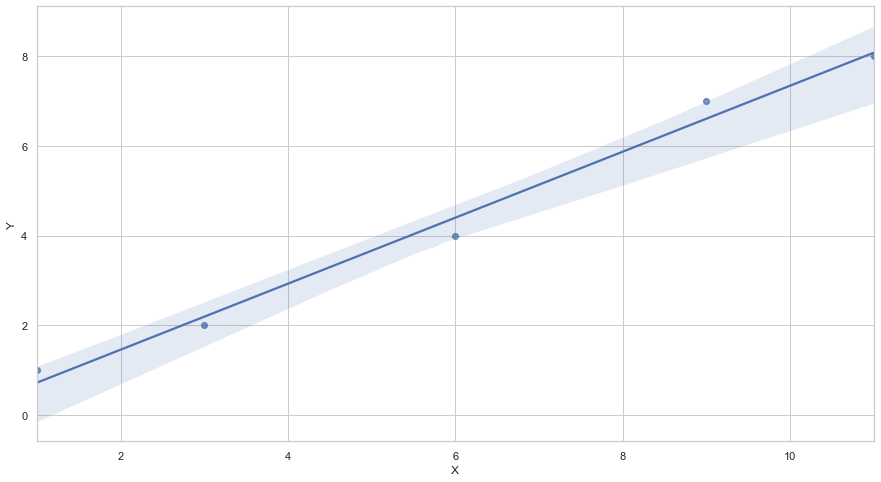

In [45]:
# Your response here. 
sns.regplot(x="X", y="Y", data=Error_analysis_2);

In [52]:
results3 = smf.ols("Y ~ X", data = Error_analysis_2).fit().summary()
results3

C:\Users\rapha\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     253.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           0.000539
Time:                        17:14:23   Log-Likelihood:               -0.99176
No. Observations:                   5   AIC:                             5.984
Df Residuals:                       3   BIC:                             5.202
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0118      0.325     -0.036      0.973      -1.047       1.024
X              0.7353      0.046     15.918      0.001       0.588       0.882
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.564
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.471
Skew:                           0.082   Prob(JB):                        0.790
Kurtosis:                       1.505   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""